#第９章　AIを説明可能にする10本ノック

## ノック81:SHAP モデルを構築してみよう

In [ ]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
 
boston = load_boston()
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df["MEDV"] = boston.target
X= df[boston.feature_names]
y = df[["MEDV"]]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)
 
print(len(X_train))
display(X_train.head(1))
print(len(X_test))
display(X_test.head(1))
 
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=0).fit(X_train,y_train)

354


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.9,34.41


152


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,0.46,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34


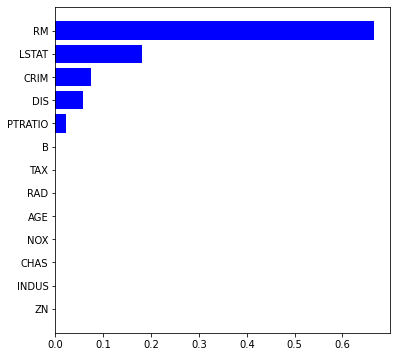

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
features = X_train.columns
importances = tree_reg.feature_importances_
indices = np.argsort(importances)
 
plt.figure(figsize=(6,6))
plt.barh(range(len(indices)), importances[indices], color="b", align="center")
plt.yticks(range(len(indices)), features[indices])
plt.show()

In [ ]:
X_test_pred = X_test.copy()
X_test_pred["pred"] = np.round(tree_reg.predict(X_test), 2)
X_test_pred.describe()[["RM","LSTAT","CRIM","DIS","PTRATIO","pred"]]

,RM,LSTAT,CRIM,DIS,PTRATIO,pred
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,6.229224,13.147763,4.207962,3.870929,18.413816,22.185592
std,0.703222,7.284263,9.154813,2.196886,2.025142,8.839852
min,3.863000,1.920000,0.013110,1.129600,12.600000,12.040000
25%,5.878000,7.777500,0.093500,2.032100,16.975000,16.870000
50%,6.157000,12.000000,0.229225,3.142300,18.700000,22.650000
75%,6.514500,17.280000,4.950015,5.491700,20.200000,22.650000
max,8.725000,37.970000,73.534100,10.710300,21.200000,50.000000


In [ ]:
X_test_pred.sort_values("RM")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,pred
367,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,22.65
374,18.49820,0.0,18.10,0.0,0.668,4.138,100.0,1.1370,24.0,666.0,20.2,396.90,37.97,12.04
386,24.39380,0.0,18.10,0.0,0.700,4.652,100.0,1.4672,24.0,666.0,20.2,396.90,28.28,12.04
144,2.77974,0.0,19.58,0.0,0.871,4.903,97.8,1.3459,5.0,403.0,14.7,396.90,29.29,16.87
366,3.69695,0.0,18.10,0.0,0.718,4.963,91.4,1.7523,24.0,666.0,20.2,316.03,14.00,22.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.12083,0.0,2.89,0.0,0.445,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21,46.25
233,0.33147,0.0,6.20,0.0,0.507,8.247,70.4,3.6519,8.0,307.0,17.4,378.95,3.95,46.25
253,0.36894,22.0,5.86,0.0,0.431,8.259,8.4,8.9067,7.0,330.0,19.1,396.90,3.54,28.55
224,0.31533,0.0,6.20,0.0,0.504,8.266,78.3,2.8944,8.0,307.0,17.4,385.05,4.14,46.25


## ノック82:回帰系モデルのSHAP値を確認してみよう

In [ ]:
!pip install shap

     |████████████████████████████████| 356 kB 21.6 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491632 sha256=b34edcd691cdba56075ada40754b0c4b3ef60c2c7605e0c95ee8efa761afc47d
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [ ]:
import shap
explainer = shap.TreeExplainer(tree_reg)
explainer

In [ ]:
shap_values = explainer.shap_values(X_test)
shap_values

array([[  0.47158564,   0.        ,   0.        , ...,   0.04999327,
          0.        ,   2.57406335],
       [ -1.59632303,   0.        ,   0.        , ...,  -0.52492938,
          0.        ,   8.7650647 ],
       [  0.47158564,   0.        ,   0.        , ...,   0.04999327,
          0.        ,   2.57406335],
       ...,
       [ -2.88802113,   0.        ,   0.        , ...,  -0.52492938,
          0.        , -12.51081884],
       [  0.47158564,   0.        ,   0.        , ...,  -0.52492938,
          0.        ,   2.57406335],
       [  0.47158564,   0.        ,   0.        , ...,  -0.52492938,
          0.        ,   2.57406335]])

## ノック83:回帰系モデルをsummary_plotで解釈してみよう

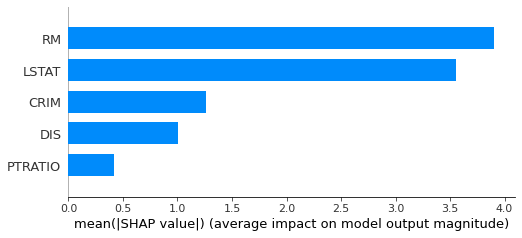

In [ ]:
shap.summary_plot(
    shap_values=shap_values
    , features=X_test
    , plot_type="bar"
    , max_display=5)

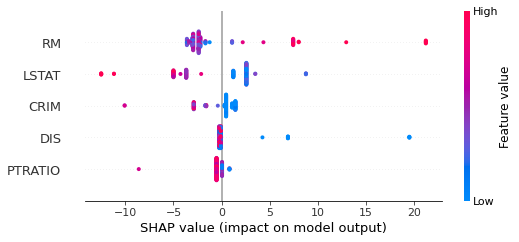

In [ ]:
shap.summary_plot(
    shap_values=shap_values
    , features=X_test
    , plot_type="dot"
    , max_display=5)

## ノック84:回帰系モデルをdependence_plotで解釈してみよう

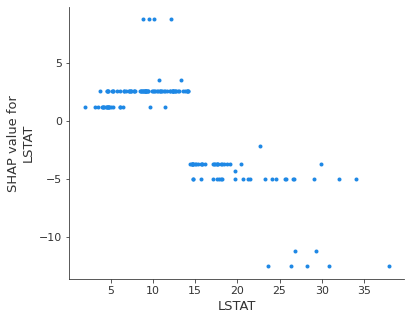

In [ ]:
shap.dependence_plot(
    ind="LSTAT",
    interaction_index=None,
    shap_values=shap_values,
    features=X_test,
)

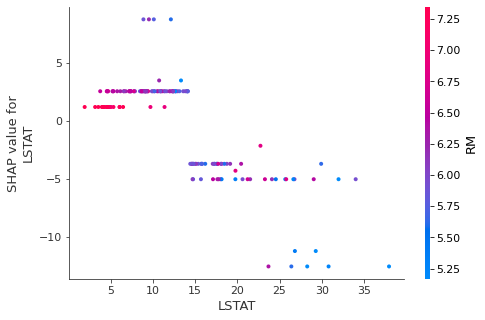

In [ ]:
shap.dependence_plot(
    ind="LSTAT",
    interaction_index="RM",
    shap_values=shap_values,
    features=X_test,
)

## ノック85:回帰系モデルをforce_plotで解釈してみよう

In [ ]:
shap.initjs()
row_index = X_test.index.get_loc(253)
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values[row_index,:],
    features=X_test.iloc[row_index,:])

## ノック86:回帰系モデルをwaterfall_plotで解釈してみよう


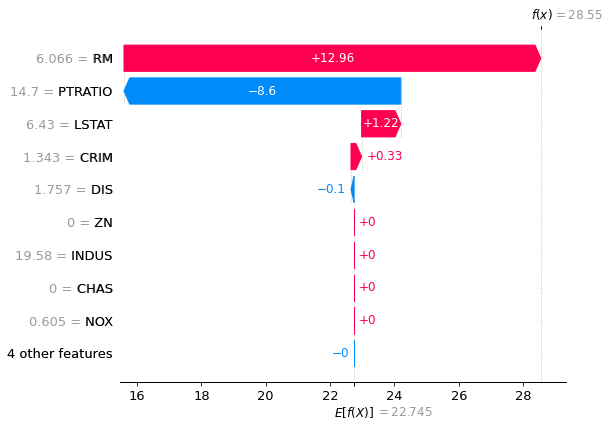

In [ ]:
row_index = X_test.index.get_loc(253)
shap.plots._waterfall.waterfall_legacy(
    expected_value=explainer.expected_value[0],
    shap_values=shap_values[row_index,:],
    features=X_train.iloc[row_index,:])

## ノック87:分類系モデルのSHAP値を確認してみよう

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
load_data = load_breast_cancer()
tg_df = pd.DataFrame(load_data.data, columns = load_data.feature_names)
tg_df["y"] = load_data.target
X = tg_df[tg_df.columns[tg_df.columns != "y"]]
y = tg_df["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(len(X_train))
display(X_train.head(1))
print(len(X_test))
display(X_test.head(1))
print(len(tg_df))
print(tg_df["y"].unique())
 
rf_cls = RandomForestClassifier(max_depth=3,random_state=0).fit(X_train, y_train)

398


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
478,11.49,14.59,73.99,404.9,0.1046,0.08228,0.05308,0.01969,0.1779,0.06574,0.2034,1.166,1.567,14.34,0.004957,0.02114,0.04156,0.008038,0.01843,0.003614,12.4,21.9,82.04,467.6,0.1352,0.201,0.2596,0.07431,0.2941,0.0918


171


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
512,13.4,20.52,88.64,556.7,0.1106,0.1469,0.1445,0.08172,0.2116,0.07325,0.3906,0.9306,3.093,33.67,0.005414,0.02265,0.03452,0.01334,0.01705,0.004005,16.41,29.66,113.3,844.4,0.1574,0.3856,0.5106,0.2051,0.3585,0.1109


569
[0 1]


In [ ]:
explainer = shap.TreeExplainer(rf_cls)
explainer

In [ ]:
shap_values = explainer.shap_values(X_test)
print(len(shap_values))
print(shap_values)

2
[array([[-0.00204042,  0.00885012, -0.01388   , ...,  0.15536879,
         0.01326914,  0.0218135 ],
       [-0.00573586,  0.00549368, -0.01736674, ..., -0.06183954,
        -0.00312969, -0.00273925],
       [-0.00284455, -0.0068685 , -0.01560846, ..., -0.05823875,
        -0.00325783, -0.00273925],
       ...,
       [-0.00631842,  0.00104957, -0.01727813, ..., -0.02886242,
        -0.00069931, -0.00362251],
       [-0.006364  ,  0.00549368, -0.01871594, ..., -0.06327393,
        -0.00258547, -0.00273925],
       [-0.01347132,  0.0053884 , -0.0230231 , ..., -0.0559037 ,
        -0.00350363, -0.00186549]]), array([[ 0.00204042, -0.00885012,  0.01388   , ..., -0.15536879,
        -0.01326914, -0.0218135 ],
       [ 0.00573586, -0.00549368,  0.01736674, ...,  0.06183954,
         0.00312969,  0.00273925],
       [ 0.00284455,  0.0068685 ,  0.01560846, ...,  0.05823875,
         0.00325783,  0.00273925],
       ...,
       [ 0.00631842, -0.00104957,  0.01727813, ...,  0.02886242,
      

## ノック88:分類系モデルをsummary_plotで解釈してみよう

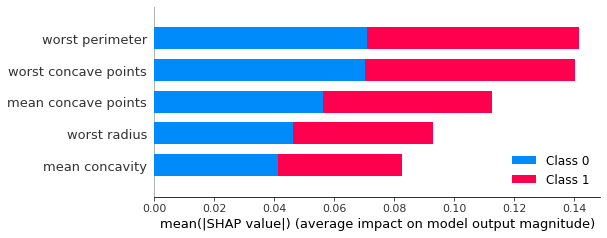

In [ ]:
shap.summary_plot(
    shap_values=shap_values
    , features=X_train
    , plot_type="bar"
    , max_display=5)

## ノック89:分類系モデルをdependence_plotで解釈してみよう

Class  0


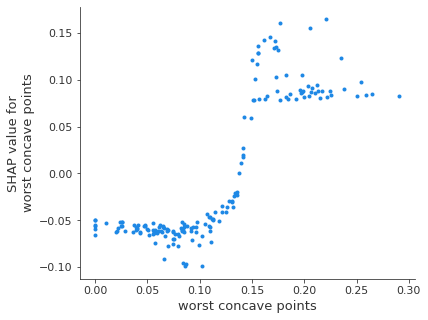

Class  1


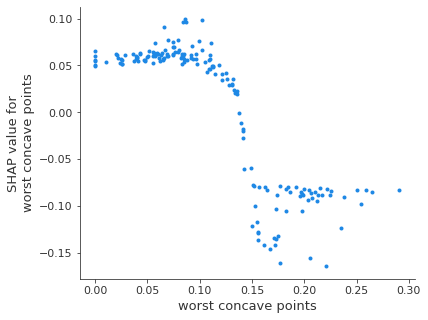

In [ ]:
for i in range(2):
    print("Class ", i)
    shap.dependence_plot(
        ind="worst concave points",
        interaction_index=None,
        shap_values=shap_values[i],
        features=X_test)

## ノック90:分類系モデルをforce_plotで解釈してみよう

In [ ]:
shap.initjs()
row_index = 2 
for i in range(2):
    print("Class ", i)
    display(shap.force_plot(explainer.expected_value[i], shap_values[i][row_index,:], X_test.iloc[row_index,:]))

Class  0


Class  1
